<a href="https://colab.research.google.com/github/AndreySotskov/ScientificPython/blob/master/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%9615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.interpolate

Text(0.5, 1.0, '"интеграл erf на интервале [0, x]"  и  "11 точек"')

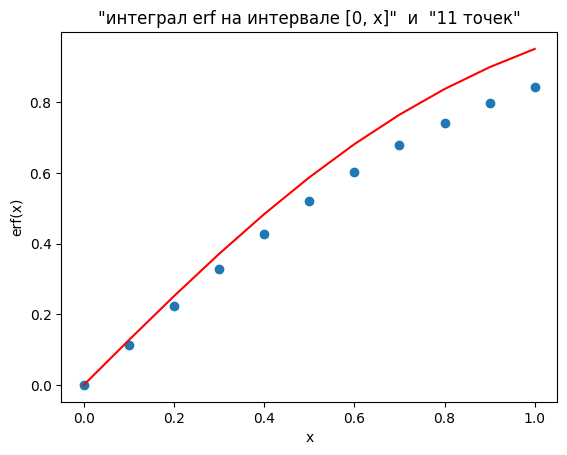

In [180]:
# Построение 11 точек
x = [float(i-1)/10 for i in range(1,12)] 
y = [scipy.special.erf(xi) for xi in x]

# Вычисление значения определенного интеграла и построение графика
def erf(x):
    return scipy.special.erf(x) * (2/np.sqrt(np.pi))
x = np.arange(0, 1.1, 0.1)
integral = [erf(xi) for xi in x] # список содержащий результаты функции erf для каждого элемента списка x

plt.plot(x, y, 'o')
plt.plot(x, integral, color = 'red')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('"интеграл erf на интервале [0, x]"  и  "11 точек"')

# **Интерполирующий многочлен 10-ой степени имеет вид:**
# P(x) = a0 + a1*x + a2*x^2 + ... + a10*x^10

### Наш многочлен будет проходить через 11 заданных точек с координатами (xi, yi).
# **Запишем 11 уравнений:** 

### 1-ое уравнение: y0 = p(x0) = a0 + a1*x0 + a2*(x0^2) + ... + a10*(x0^10)
### 2-ое уравнение: y1 = p(x1) = a0 + a1*x1 + a2*(x1^2) + ... + a10*(x1^10)
# ...
### 11-ое уравнение: y10 = p(x10) = a0 + a1*x10 + a2*(x10^2) + ... + a10*(x10^10)

### **Находим число обусловленности матрицы A**

In [181]:
A = np.vander(x, 11) 
cond_A = np.linalg.cond(A) 
print('Число обусловленности матрицы A:', cond_A)

Число обусловленности матрицы A: 115575244.58365089


## **Решаем систему и проверяем достоверность решения**
### **Решение системы:**  x = inv(A)*b
#### inv(A) - обратная матрица A;
#### b - вектор значений функции erf(x) в заданных точках.

In [182]:
inv_A = np.linalg.inv(A)
cond_A = []
for i in range(2, 30):
    A = np.vander(x, i)
    cond_A.append(np.linalg.cond(A))
# находим вектор коэффициентов многочлена
k = inv_A.dot(y) 
interp_y = np.polyval(k, x)
print('Погрешность:', np.linalg.norm(y - interp_y)) # норма разности между y и y_interp
# Норма разности меньше 10^-16, что значит, что решение достоверно

Погрешность: 3.7786951618035077e-10


### * Протабулируем значение интерполяционного многочлена на интервале [0,1]

In [183]:
interp_x = np.arange(0, 1.01, 0.01)
interp_y = np.polyval(k, interp_x)

### * Вычислим значение функции erf(x) на интервале [0,1] в промежуточных точках, сравним с интерполяционным многочленом и вычислим абсолютную и относительную ошибки.



Абсолютная ошибка: 1.9065845568988493e-09
Относительная ошибка: 2.2624691620678443e-09


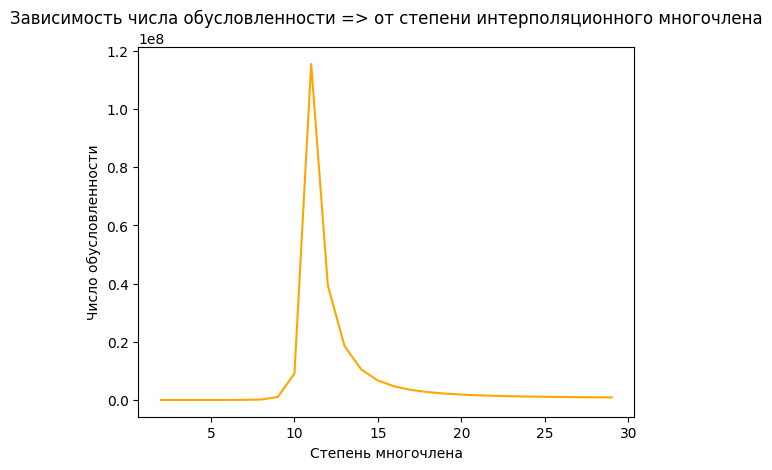

In [184]:
True_y = [scipy.special.erf(xi) for xi in interp_x]

abs = np.linalg.norm(True_y - interp_y, np.inf)
otn = abs / np.linalg.norm(True_y, np.inf)

print('Абсолютная ошибка:', abs)
print('Относительная ошибка:', otn)

plt.plot(range(2, 30), cond_A, color = 'orange')
plt.xlabel('Cтепень многочлена')
plt.ylabel('Число обусловленности')
plt.title('Зависимость числа обусловленности => от степени интерполяционного многочлена')

plt.show()

## **Сравнение коэффициентов с помощью функции polyfit**
###### Разница между коэффициентами двух многочленов мала, что говорит о том, что оба многочлена приближают данные точки с высокой точностью.

In [185]:
polifit_K = np.polyfit(x, y, 10) 
print('Коэффициенты, найденные функцией polyfit:', polifit_K)
print('Разница между коэффициентами двух многочленов:', np.linalg.norm(k - polifit_K, np.inf)) 

Коэффициенты, найденные функцией polyfit: [-1.46537036e-03  5.41662268e-03  2.13905320e-03 -2.99669745e-02
  2.22912474e-03  1.11876424e-01  2.56838218e-04 -3.76167525e-01
  3.55779531e-06  1.12837904e+00 -2.97086043e-16]
Разница между коэффициентами двух многочленов: 4.4186817403819856e-09


#**Кубический эрмитов интерполянт**

Абсолютная ошибка для эрмитова интерполянта: 0.00014191474508963575
Относительная ошибка для эрмитова интерполянта: 0.0001684046654244741


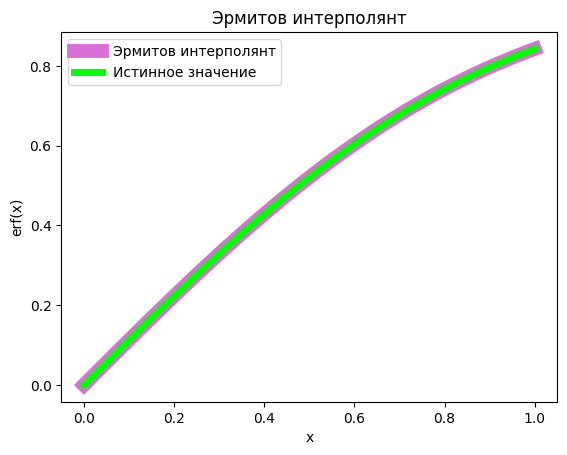

In [186]:
f = scipy.interpolate.PchipInterpolator(x, y)
pchip_y = f(interp_x)

abs_pchip = np.linalg.norm(True_y - pchip_y, np.inf)
otn_pchip = abs_pchip / np.linalg.norm(True_y, np.inf)
print('Абсолютная ошибка для эрмитова интерполянта:', abs_pchip)
print('Относительная ошибка для эрмитова интерполянта:', otn_pchip)

plt.plot(interp_x, pchip_y, linewidth=10, label='Эрмитов интерполянт', color = 'orchid')
plt.plot(interp_x, True_y, linewidth=5, label='Истинное значение', color = 'lime')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Эрмитов интерполянт')
plt.legend()
plt.show() 

#**Кубический сплайн** 

Абсолютная ошибка для кубического сплайна: 7.082368025601582e-06
Относительная ошибка для кубического сплайна: 8.404368531339685e-06


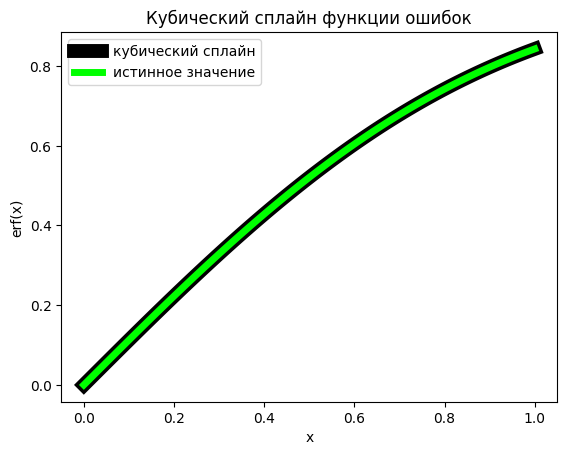

In [187]:
g = scipy.interpolate.interp1d(x, y, kind='cubic')
spline_y = g(interp_x)

abs_spline = np.linalg.norm(True_y - spline_y, np.inf)
otn_spline = abs_spline / np.linalg.norm(True_y, np.inf)
print('Абсолютная ошибка для кубического сплайна:', abs_spline)
print('Относительная ошибка для кубического сплайна:', otn_spline)


plt.plot(interp_x, spline_y, linewidth=10, label='кубический сплайн', color = 'black')
plt.plot(interp_x, True_y, linewidth=5, label='истинное значение', color = 'lime')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Кубический сплайн функции ошибок')
plt.legend()
plt.show() 

# **Сравнение результатов**
#####результаты отличаются после 4 знака после запятой

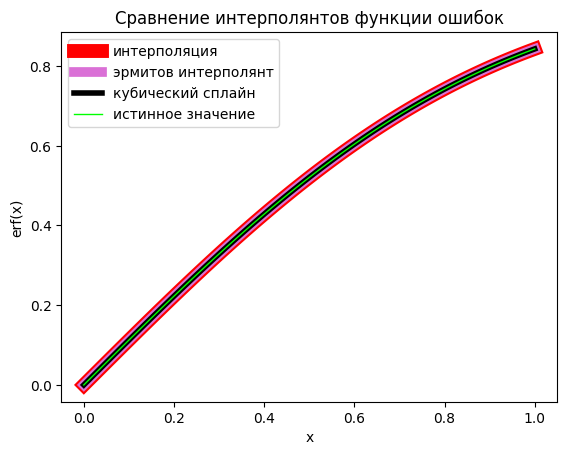

Интерполяция:
 [0.     0.0113 0.0226 0.0338 0.0451 0.0564 0.0676 0.0789 0.0901 0.1013
 0.1125 0.1236 0.1348 0.1459 0.1569 0.168  0.179  0.19   0.2009 0.2118
 0.2227 0.2335 0.2443 0.255  0.2657 0.2763 0.2869 0.2974 0.3079 0.3183
 0.3286 0.3389 0.3491 0.3593 0.3694 0.3794 0.3893 0.3992 0.409  0.4187
 0.4284 0.438  0.4475 0.4569 0.4662 0.4755 0.4847 0.4937 0.5027 0.5117
 0.5205 0.5292 0.5379 0.5465 0.5549 0.5633 0.5716 0.5798 0.5879 0.5959
 0.6039 0.6117 0.6194 0.627  0.6346 0.642  0.6494 0.6566 0.6638 0.6708
 0.6778 0.6847 0.6914 0.6981 0.7047 0.7112 0.7175 0.7238 0.73   0.7361
 0.7421 0.748  0.7538 0.7595 0.7651 0.7707 0.7761 0.7814 0.7867 0.7918
 0.7969 0.8019 0.8068 0.8116 0.8163 0.8209 0.8254 0.8299 0.8342 0.8385
 0.8427]
Кубический эрмитов интерполянт:
 [0.     0.0113 0.0227 0.034  0.0453 0.0565 0.0677 0.079  0.0901 0.1013
 0.1125 0.1236 0.1347 0.1458 0.1569 0.168  0.179  0.19   0.201  0.2119
 0.2227 0.2335 0.2443 0.255  0.2657 0.2763 0.2869 0.2974 0.3079 0.3183
 0.3286 0.3389 0.349

In [199]:
plt.plot(interp_x, interp_y, linewidth=10, label='интерполяция', color = 'red')
plt.plot(interp_x, pchip_y, linewidth=7, label='эрмитов интерполянт', color = 'orchid')
plt.plot(interp_x, spline_y, linewidth=4, label='кубический сплайн', color = 'black')
plt.plot(interp_x, True_y, linewidth=1, label='истинное значение', color = 'lime')

plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Сравнение интерполянтов функции ошибок')
plt.legend()
plt.show() 

print('Интерполяция:\n',np.round(interp_y, 4))
print('Кубический эрмитов интерполянт:\n',np.round(pchip_y, 4))
print('Кубический сплайн:\n',np.round(spline_y, 4))
print('Истинное значение:\n',np.round(True_y, 4))
